In [294]:
# Ques 1
# import data from pattern file
import numpy as np
data = np.loadtxt("pattern1.txt");

In [295]:
# our input array should be corrosponding to 26 alphabets and transpose it to take 156 inputs
X = data.reshape(26, 156).T

# output is the ascii value from A to Z
ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

# convert/format the ascii value to binary which will be the actual output in binary
Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)
# transpose the output array to take 7 outputs
Y = Y.T

In [296]:
# model specifications
Ni=156; Nh=14; No=7;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))

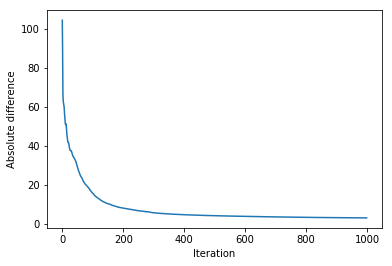

In [297]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

plt.xlabel("Iteration")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()

In [298]:
# convert binary to ascii
def binAscii(value):
    ascii_val = int(value, 2)
    return ascii_val;

In [299]:
# make predictions on trained data
# take every element of the predict array, round it to the nearest integer
# compare every alphabet binary number to the actual binary number
# lastly convert the binary to ascii
score = 0
for i,k in zip(y.T,Y.T):
    predict = ""; actual=""
    for j,l in zip(i,k):
        predict += str(int(round(j)))
        actual += str(int(round(l)))
    if(predict == actual):
        score+=1
    print(binAscii(predict))

accuracy_score = (score/26)*100;
print("Accuracy Score");
print(accuracy_score)


65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
69
86
87
88
89
90
Accuracy Score
96.15384615384616


In [ ]:
# Question 2
# Noise MLP can tolerate to recognise the letter 
# try different levels of noise to determine the accuracy

# Introduce noise means flip the bits in the actual pattern 1 and check for accuracy

In [ ]:
# data is already trained on pattern1
# i flipped the data in pattern1 and tested the accuracy

In [307]:
# testing on 1% noisy data
iters=100
# convert data to support 26 alphabets
accuracy_score = []
# repeat it for 100 iterations
for itr in range(iters):
    data = np.loadtxt("pattern1.txt");
    new_data = data.reshape(26, 156);
    # add approx 1% noise in the system by flipping 52 bits 
    for i in range(26):
        for j in range(2):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1 

    # new X after flipping data
    X = new_data.T
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    # calculate accuracy score for each iteration
    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    acc_sc = (score/26)*100
    accuracy_score.append(acc_sc);
# mean of all the accuracy scores
print("Mean accuracy Score for 1% noise is");
print(np.mean(accuracy_score))


Mean accuracy Score for 1% noise is
84.53846153846152


In [310]:
# testing on 10% noisy data
iters=100
# convert data to support 26 alphabets
accuracy_score = []
# repeat it for 100 iterations
for itr in range(iters):
    data = np.loadtxt("pattern1.txt");
    new_data = data.reshape(26, 156);
    # add approx 10% noise in the system by flipping 390 bits 
    for i in range(26):
        for j in range(15):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1 

    # new X after flipping data
    X = new_data.T
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    # calculate accuracy score for each iteration
    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    acc_sc = (score/26)*100
    accuracy_score.append(acc_sc);
# mean of all the accuracy scores
print("Mean accuracy Score for 10% noise is");
print(np.mean(accuracy_score))


Mean accuracy Score for 10% noise is
42.192307692307686


In [311]:
# teating on 30% noisy data
iters=100
# convert data to support 26 alphabets
accuracy_score = []
# repeat it for 100 iterations
for itr in range(iters):
    data = np.loadtxt("pattern1.txt");
    new_data = data.reshape(26, 156);
    # add approx 30% noise in the system by flipping 1222 bits 
    for i in range(26):
        for j in range(47):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1 

    # new X after flipping data
    X = new_data.T
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    # calculate accuracy score for each iteration
    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    acc_sc = (score/26)*100
    accuracy_score.append(acc_sc);
# mean of all the accuracy scores
print("Mean accuracy Score for 30% noise");
print(np.mean(accuracy_score))


Mean accuracy Score for 30% noise
15.69230769230769


In [313]:
# testing on 60% noisy data
iters=100
# convert data to support 26 alphabets
accuracy_score = []
# repeat it for 100 iterations
for itr in range(iters):
    data = np.loadtxt("pattern1.txt");
    new_data = data.reshape(26, 156);
    # add approx 60% noise in the system by flipping 2444 bits 
    for i in range(26):
        for j in range(94):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1 

    # new X after flipping data
    X = new_data.T
    h=1/(1+np.exp(-wh@X))
    y=1/(1+np.exp(-wo@h))

    # calculate accuracy score for each iteration
    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    acc_sc = (score/26)*100
    accuracy_score.append(acc_sc);
# mean of all the accuracy scores
print("Mean accuracy Score of 60% noise");
print(np.mean(accuracy_score))


Mean accuracy Score of 60% noise
8.499999999999998


Question3:

We will first train the data on pattern1 (done in Ques 1, repeated here)

Then we will test patern 2 based on the training on pattern1.

The alphabet identified is K.

Observation:
Everytime I train pattern 1 , pattern 2 recognises a different alphabet everytime based on the training received.

In [325]:
# train on pattern 1 (repeated from Question 1)
import numpy as np
data = np.loadtxt("pattern1.txt");

X = data.reshape(26, 156).T

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)
Y = Y.T

Ni=156; Nh=14; No=7;

Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))



In [326]:
# test for pattern 2 based on the training above
test_pattern = np.loadtxt('pattern2.txt')
# flatten the pattern and convert it into 156 by 1 matrix because its one alphabet present
X = test_pattern.ravel().T;
h=1/(1+np.exp(-wh@X))
y=1/(1+np.exp(-wo@h))

# y is predicted ; round it off to nearest integer
predict_binary = ""
for j in y:
    predict_binary += str(int(round(j)))

# covert binary to ascii
ascii_letter = binAscii(predict_binary)

# convert ascii to alphabet
alphabet = ascii_letter.to_bytes((ascii_letter.bit_length() + 7) // 8, 'big').decode()
print("alphabet is ")
print(alphabet)

alphabet is 
K


In [ ]:
# Question 4 Part 1
# Impact Of hidden nodes on network performance
# Try different nodes


In [337]:
# training on 6 hidden nodes
import numpy as np
data = np.loadtxt("pattern1.txt");

X = data.reshape(26, 156).T

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)

Y = Y.T

# chose hidden node 6
Ni=156; Nh=6; No=7;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))

score = 0
for i,k in zip(y.T,Y.T):
    predict = ""; actual=""
    for j,l in zip(i,k):
        predict += str(int(round(j)))
        actual += str(int(round(l)))
    if(predict == actual):
        score+=1
    print(binAscii(predict))

accuracy_score = (score/26)*100;
print("Accuracy Score for 6 hidden nodes");
print(accuracy_score)



65
74
67
70
71
86
71
72
73
66
73
77
77
78
79
80
81
82
81
80
85
84
85
88
81
90
Accuracy Score for 6 hidden nodes
53.84615384615385


In [338]:
# training on 14 hidden nodes
import numpy as np
data = np.loadtxt("pattern1.txt");

X = data.reshape(26, 156).T

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)

Y = Y.T

# chose hidden node 14
Ni=156; Nh=14; No=7;

Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))

score = 0
for i,k in zip(y.T,Y.T):
    predict = ""; actual=""
    for j,l in zip(i,k):
        predict += str(int(round(j)))
        actual += str(int(round(l)))
    if(predict == actual):
        score+=1
    print(binAscii(predict))

accuracy_score = (score/26)*100;
print("Accuracy Score for 14 hidden nodes");
print(accuracy_score)


65
66
67
70
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
Accuracy Score for 14 hidden nodes
96.15384615384616


In [339]:
# training on 20 hidden nodes
import numpy as np
data = np.loadtxt("pattern1.txt");

X = data.reshape(26, 156).T

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)

Y = Y.T

# chose hidden node 20
Ni=156; Nh=20; No=7;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern

    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9*dwo+do@h.T
    wo=wo+0.1*dwo
    dwh=0.9*dwh+dh@X.T
    wh=wh+0.1*dwh
    
    error=np.append(error,np.sum(abs(Y-y)))

score = 0
for i,k in zip(y.T,Y.T):
    predict = ""; actual=""
    for j,l in zip(i,k):
        predict += str(int(round(j)))
        actual += str(int(round(l)))
    if(predict == actual):
        score+=1
    print(binAscii(predict))

accuracy_score = (score/26)*100;
print("Accuracy Score for 20 hidden nodes");
print(accuracy_score)


65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
Accuracy Score for 20 hidden nodes
100.0


In [ ]:
# Question 4 Part 2
# Impact Of noise on network performance when trained
# Try different noise

In [345]:
# training on 1% noisy data
import numpy as np
data = np.loadtxt("pattern1.txt");

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)
# transpose the output array to take 7 outputs
Y = Y.T

# model specifications
Ni=156; Nh=14; No=7;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])
accuracy_score = []
# repeat this for 50 iterations
for itr in range(50):
    new_data = data.reshape(26, 156)
    for i in range(26):
    # introduce 1% noise by flipping 1 % of the total bits in the pattern
        for j in range(2):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1
    X = new_data.T
    # train it for 1000 iterations
    for trial in range(Ntrials):
        h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
        y=1/(1+np.exp(-wo@h)) #output for all pattern

        do=y*(1-y)*(Y-y)  # delta output
        dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
        # update weights with momentum
        dwo=0.9*dwo+do@h.T
        wo=wo+0.1*dwo
        dwh=0.9*dwh+dh@X.T
        wh=wh+0.1*dwh
    
        error=np.append(error,np.sum(abs(Y-y)))

    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    
    # append accuracy score of each iteration
    accuracy_score.append((score/26)*100);

# mean of the accuracy of all the iterations
print("Accuracy Score for 1 % noise");
print(np.mean(accuracy_score))


Accuracy Score for 1 % noise
96.53846153846152


In [346]:
# training on 10% noisy data
import numpy as np
data = np.loadtxt("pattern1.txt");

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)
# transpose the output array to take 7 outputs
Y = Y.T

# model specifications
Ni=156; Nh=14; No=7;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])
accuracy_score = []
# repeat this for 50 iterations
for itr in range(50):
    new_data = data.reshape(26, 156)
    for i in range(26):
    # introduce 10% noise by flipping 10% of the total bits in the pattern
        for j in range(15):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1
    X = new_data.T
    # train it for 1000 iterations
    for trial in range(Ntrials):
        h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
        y=1/(1+np.exp(-wo@h)) #output for all pattern

        do=y*(1-y)*(Y-y)  # delta output
        dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
        # update weights with momentum
        dwo=0.9*dwo+do@h.T
        wo=wo+0.1*dwo
        dwh=0.9*dwh+dh@X.T
        wh=wh+0.1*dwh
    
        error=np.append(error,np.sum(abs(Y-y)))

    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    
    # append accuracy score of each iteration
    accuracy_score.append((score/26)*100);

# mean of the accuracy of all the iterations
print("Accuracy Score for 10% noise");
print(np.mean(accuracy_score))

Accuracy Score for 10% noise
93.53846153846152


In [347]:
# training on 30% noise data
import numpy as np
data = np.loadtxt("pattern1.txt");

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)
# transpose the output array to take 7 outputs
Y = Y.T

# model specifications
Ni=156; Nh=14; No=7;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])
accuracy_score = []
# repeat this for 50 iterations
for itr in range(50):
    new_data = data.reshape(26, 156)
    for i in range(26):
    # introduce 30% noise by flipping 30% of the total bits in the pattern
        for j in range(47):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1
    X = new_data.T
    # train it for 1000 iterations
    for trial in range(Ntrials):
        h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
        y=1/(1+np.exp(-wo@h)) #output for all pattern

        do=y*(1-y)*(Y-y)  # delta output
        dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
        # update weights with momentum
        dwo=0.9*dwo+do@h.T
        wo=wo+0.1*dwo
        dwh=0.9*dwh+dh@X.T
        wh=wh+0.1*dwh
    
        error=np.append(error,np.sum(abs(Y-y)))

    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    
    # append accuracy score of each iteration
    accuracy_score.append((score/26)*100);

# mean of the accuracy of all the iterations
print("Accuracy Score for 30% noise");
print(np.mean(accuracy_score))

Accuracy Score for 30% noise
47.461538461538446


In [348]:
# training on 60% noisy data
import numpy as np
data = np.loadtxt("pattern1.txt");

ascii_value = np.array([65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90]);

Y = [];
for i in range(len(ascii_value)):
    Y.append([int(x) for x in list('{0:b}'.format(ascii_value[i]))])
Y = np.array(Y)

Y = Y.T

Ni=156; Nh=14; No=7;

Ntrials=1000
wh=np.random.randn(Nh,Ni);
dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])
accuracy_score = []
# repeat this for 50 iterations
for itr in range(50):
    new_data = data.reshape(26, 156)
    for i in range(26):
    # introduce 60% noise by flipping 60% of the total bits in the pattern
        for j in range(94):
            value = np.random.randint(0, 156)
            if(new_data[i,value]==1):
                new_data[i,value] = 0
            elif(new_data[i,value]==0):
                new_data[i,value] = 1
    X = new_data.T
    # train it for 1000 iterations
    for trial in range(Ntrials):
        h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
        y=1/(1+np.exp(-wo@h)) #output for all pattern

        do=y*(1-y)*(Y-y)  # delta output
        dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
        # update weights with momentum
        dwo=0.9*dwo+do@h.T
        wo=wo+0.1*dwo
        dwh=0.9*dwh+dh@X.T
        wh=wh+0.1*dwh
    
        error=np.append(error,np.sum(abs(Y-y)))

    score = 0
    for i,k in zip(y.T,Y.T):
        predict = ""; actual=""
        for j,l in zip(i,k):
            predict += str(int(round(j)))
            actual += str(int(round(l)))
        if(predict == actual):
            score+=1
    
    # append accuracy score of each iteration
    accuracy_score.append((score/26)*100);

# mean of the accuracy of all the iterations
print("Accuracy Score for 60% noise is");
print(np.mean(accuracy_score))

Accuracy Score for 60% noise is
26.23076923076923
